<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/homework_2/HW2_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

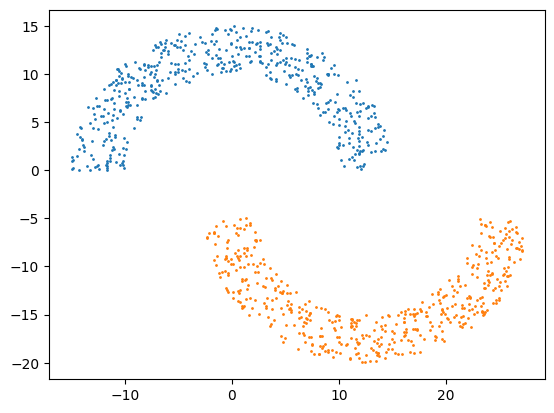

In [2]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [3]:
data_top = np.array(top)
labels_top = np.ones(data_top.shape[0])

data_bottom = np.array(bottom)
labels_bottom = -np.ones(data_bottom.shape[0])

data = np.vstack([data_top, data_bottom])
labels = np.hstack([labels_top, labels_bottom])

data = np.hstack((np.ones((data.shape[0], 1)), data))

In [4]:
def pla(X, Y, max_iter=1000):
    w = np.zeros(X.shape[1])
    iterations = 0

    for _ in range(max_iter):
        misclassified = False

        for i in range(X.shape[0]):
            if Y[i] * np.dot(w, X[i, :]) <= 0:
                w = w + Y[i] * X[i, :]
                misclassified = True
                iterations += 1

        if not misclassified:
            break
    return w, iterations

w, iterations = pla(data, labels)
print(f"PLA converged after {iterations} iterations.")
print(w)

PLA converged after 12 iterations.
[12.         -1.36186828 30.7134481 ]


In [5]:
def linear_regression(data, labels):
    x_t = np.transpose(data)
    xt_x = np.matmul(x_t, data)
    xtx_inv = np.linalg.inv(xt_x)
    xt_x_x = np.matmul(xtx_inv, x_t)
    w = np.matmul(xt_x_x, labels)

    return w

w_lr = linear_regression(data, labels)
w_lr

array([ 0.25654132, -0.01044888,  0.07636209])

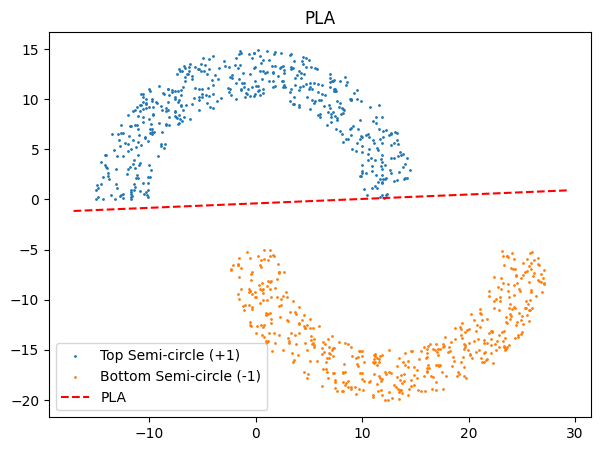

In [6]:
def plot_data_and_boundary(w, title):
    plt.figure(figsize=(7, 5))

    plt.scatter(X1,Y1,s = 1, label='Top Semi-circle (+1)')
    plt.scatter(X2,Y2,s = 1, label='Bottom Semi-circle (-1)')

    axes = plt.gca()
    x = np.array(axes.get_xlim())
    y = -w[0]/w[2] - w[1]/w[2] * x
    plt.plot(x, y, '--', c ='red', label=title)

    plt.title(title)
    plt.legend()
    plt.show()

# LP 1 (a)
plot_data_and_boundary(w, "PLA")

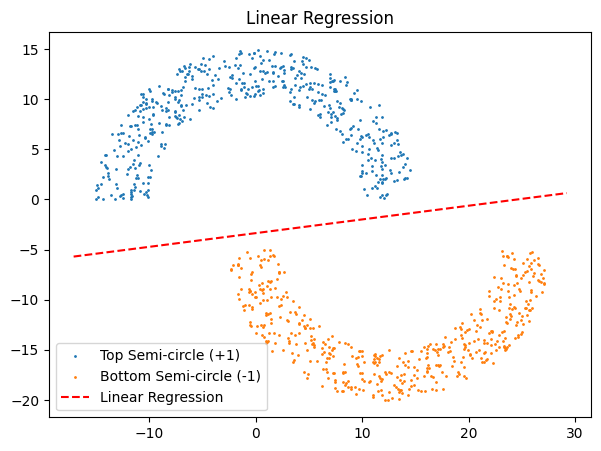

In [7]:
# LP 1 (b)
plot_data_and_boundary(w_lr, "Linear Regression")

In [21]:
top,bottom = generatedata(rad,thk,sep=-5,n=2000)
data_top = np.array(top)
labels_top = np.ones(data_top.shape[0])

data_bottom = np.array(bottom)
labels_bottom = -np.ones(data_bottom.shape[0])

data = np.vstack([data_top, data_bottom])
labels = np.hstack([labels_top, labels_bottom])

data = np.hstack((np.ones((data.shape[0], 1)), data))

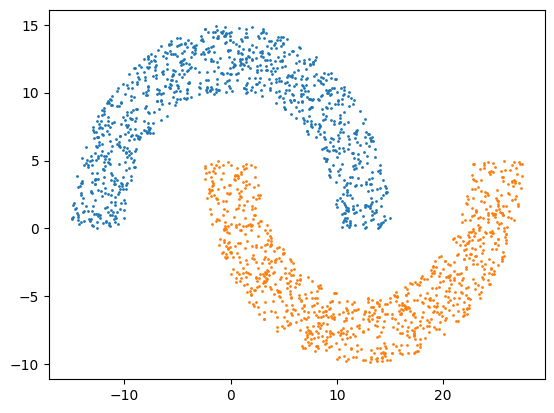

In [22]:
X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [23]:
def pocket_algorithm(data, labels, max_iter=100000):

    weights = np.zeros(data.shape[1])
    pocket_weights = np.copy(weights)

    errors = []

    initial_error = np.mean(np.sign(np.dot(data, weights)) != labels)
    errors.append(initial_error)
    pocket_error = initial_error


    for _ in range(max_iter):

        misclassified = np.where(np.sign(np.dot(data, weights)) != labels)[0]

        if len(misclassified) == 0:
            break

        random_index = np.random.choice(misclassified)
        weights += labels[random_index] * data[random_index]

        current_error = np.mean(np.sign(np.dot(data, weights)) != labels)
        errors.append(current_error)

        if current_error < pocket_error:
            pocket_weights = np.copy(weights)
            pocket_error = current_error

    return pocket_weights, errors

w_pocket, error_history = pocket_algorithm(data, labels, max_iter=100000)
w_pocket

array([-41.        ,  -4.3502964 ,  29.51936502])

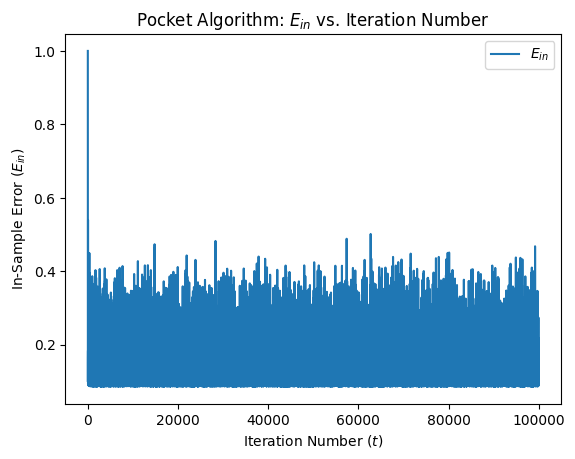

In [24]:
# Plotting Ein vs. iteration number t
plt.plot(error_history, label=r'$E_{in}$')
plt.xlabel("Iteration Number ($t$)")
plt.ylabel(r"In-Sample Error ($E_{in}$)")
plt.title(r"Pocket Algorithm: $E_{in}$ vs. Iteration Number")
plt.legend()
plt.show()

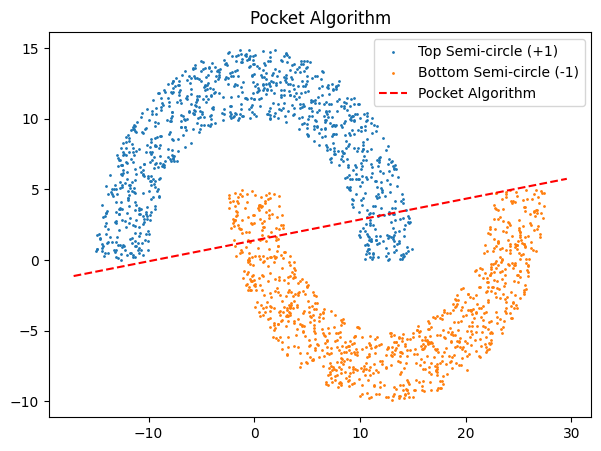

In [25]:
# LP 2 (c)
plot_data_and_boundary(w_pocket, "Pocket Algorithm")

In [26]:
w_lr_new = linear_regression(data, labels)
w_lr_new

array([-0.1020728 , -0.02315436,  0.1002931 ])

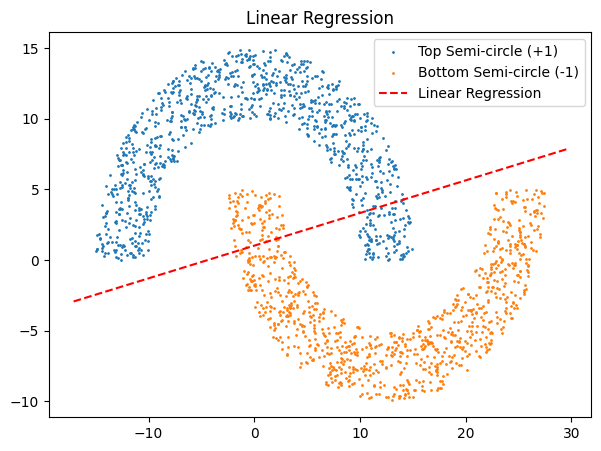

In [27]:
plot_data_and_boundary(w_lr_new, "Linear Regression")

In [28]:
import time
# Compute E_in
def compute_error(w, X, y):
    return np.mean(np.sign(np.dot(X,w)) != y)

# Linear Regression
start_time = time.time()
w_linreg = linear_regression(data, labels)
linreg_time = time.time() - start_time
linreg_error = compute_error(w_linreg, data, labels)

start_time = time.time()
w_pocket, error = pocket_algorithm(data, labels, max_iter=100000)
pocket_time = time.time() - start_time
pocket_error = compute_error(w_pocket, data, labels)

# HP 2 (d)
print(f"Linear Regression: Time taken = {linreg_time:.5f} seconds, E_in = {linreg_error:.5f}")
print(f"Pocket Algorithm: Time taken = {pocket_time:.5f} seconds, E_in = {pocket_error:.5f}")

print("\nLinear regression typically runs faster than the Pocket algorithm especially for large iteration counts. ")
print("This is because linear regression uses a direct mathematical approach, while the Pocket algorithm involves iterative improvements over many iterations.")

Linear Regression: Time taken = 0.00457 seconds, E_in = 0.09550
Pocket Algorithm: Time taken = 8.73051 seconds, E_in = 0.08500

Linear regression typically runs faster than the Pocket algorithm especially for large iteration counts. 
This is because linear regression uses a direct mathematical approach, while the Pocket algorithm involves iterative improvements over many iterations.


In [ ]:
# # Third-order polynomial feature transformation
# def transform_features(x):
#     X1 = x[:, 1]
#     X2 = x[:, 2]
#     transformed = np.column_stack([
#         x[:, 0],  # Bias term
#         X1,
#         X2,
#         X1**2,
#         X2**2,
#         X1*X2,
#         X1**3,
#         X2**3,
#         X1**2*X2,
#         X1*X2**2
#     ])
#     return transformed

# X_transformed = transform_features(data)
# X_transformed[:5]

In [29]:
from sklearn.preprocessing import PolynomialFeatures
# Extracting original features without bias term
original_data = data[:, 1:]

# Creating 3rd order polynomial features using sklearn
poly_transformer = PolynomialFeatures(degree=3, include_bias=True)
poly_data = poly_transformer.fit_transform(original_data)

poly_data.shape, poly_data[: 3]

((2000, 10),
 array([[ 1.00000000e+00, -1.31643392e+01,  5.30623003e+00,
          1.73299827e+02, -6.98530122e+01,  2.81560772e+01,
         -2.28137771e+03,  9.19568748e+02, -3.70656151e+02,
          1.49402622e+02],
        [ 1.00000000e+00,  1.39970105e+01,  7.61421384e-02,
          1.95916302e+02,  1.06576231e+00,  5.79762525e-03,
          2.74224254e+03,  1.49174862e+01,  8.11494213e-02,
          4.41443584e-04],
        [ 1.00000000e+00, -7.21451380e+00,  1.23720780e+01,
          5.20492094e+01, -8.92585276e+01,  1.53068314e+02,
         -3.75509740e+02,  6.43956879e+02, -1.10431347e+03,
          1.89377312e+03]]))

In [30]:
w_pocket_transformed, error_history_transformed = pocket_algorithm(poly_data, labels, max_iter=100000)
w_pocket_transformed

array([ -78026.        ,  -68784.19510825,  -23518.09772187,
        138811.8864449 ,  135067.585016  , -167182.15680708,
         -9539.12497687,    6912.69265579,  -13015.62513006,
         22132.59758775])

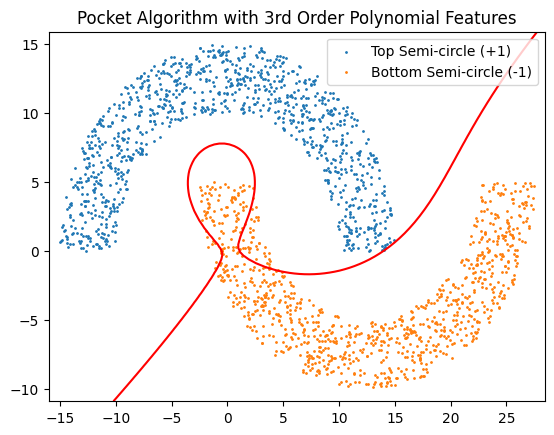

In [31]:
plt.scatter(X1,Y1,s = 1, label='Top Semi-circle (+1)')
plt.scatter(X2,Y2,s = 1, label='Bottom Semi-circle (-1)')

x_min, x_max = data[:, 1].min() - 1, data[:, 1].max() + 1
y_min, y_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly_transformer.transform(grid)

Z = np.dot(grid_poly[:, 1:], w_pocket_transformed[1:]) + w_pocket_transformed[0]
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='red')

plt.title("Pocket Algorithm with 3rd Order Polynomial Features")
plt.legend(loc='upper right')
plt.show()
#plot4poly(w_pocket_transformed[0],w_pocket_transformed[1],w_pocket_transformed[2],w_pocket_transformed[3])

In [32]:
w_lr_transformed = linear_regression(poly_data, labels)
w_lr_transformed

array([-8.31247940e-01,  2.11017549e-02,  1.31209315e-01,  8.44771819e-03,
        1.16369342e-02,  1.35998975e-02, -3.83568957e-04, -5.13265688e-04,
       -1.01578954e-03, -9.97852844e-04])

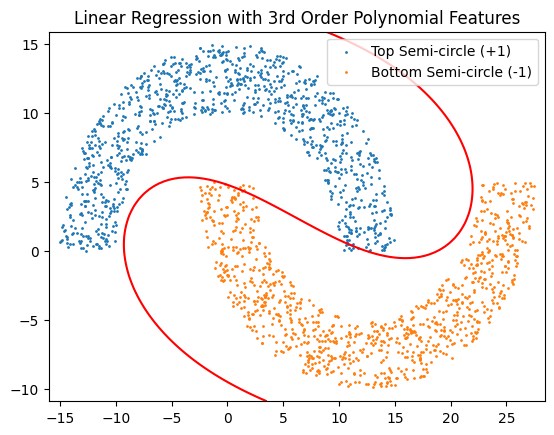

In [33]:
plt.scatter(X1,Y1,s = 1, label='Top Semi-circle (+1)')
plt.scatter(X2,Y2,s = 1, label='Bottom Semi-circle (-1)')

x_min, x_max = data[:, 1].min() - 1, data[:, 1].max() + 1
y_min, y_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly_transformer.transform(grid)

Z = np.dot(grid_poly[:, 1:], w_lr_transformed[1:]) + w_lr_transformed[0]
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='red')

plt.title("Linear Regression with 3rd Order Polynomial Features")
plt.legend(loc='upper right')
plt.show()

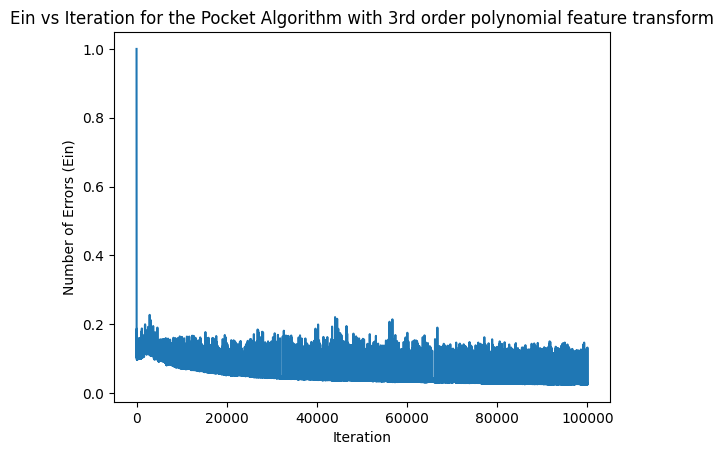

In [34]:
plt.plot(error_history_transformed)
plt.xlabel('Iteration')
plt.ylabel('Number of Errors (Ein)')
plt.title('Ein vs Iteration for the Pocket Algorithm with 3rd order polynomial feature transform')
plt.show()

In [35]:
# Linear Regression with 3rd order polynomial feature transform
start_time = time.time()
w_linreg_transformed = linear_regression(poly_data, labels)
linreg_time_transformed = time.time() - start_time
linreg_error_transformed = compute_error(w_linreg_transformed, poly_data, labels)

# Pocket Algorithm with 3rd order polynomial feature transform
start_time = time.time()
w_pocket_transformed, _ = pocket_algorithm(poly_data, labels, max_iter=100000)
pocket_time_transformed = time.time() - start_time
pocket_error_transformed = compute_error(w_pocket_transformed, poly_data, labels)

print(f"Linear Regression with 3rd order polynomial feature transform: Time taken = {linreg_time_transformed:.5f} seconds, E_in = {linreg_error_transformed:.5f}")
print(f"Pocket Algorithm with 3rd order polynomial feature transform: Time taken = {pocket_time_transformed:.5f} seconds, E_in = {pocket_error_transformed:.5f}")

print("\nUsing a 3rd order polynomial feature transform can capture more complex relationships in the data. However, it also introduces the risk of overfitting, especially with a limited number of data points.")


Linear Regression with 3rd order polynomial feature transform: Time taken = 0.00503 seconds, E_in = 0.00550
Pocket Algorithm with 3rd order polynomial feature transform: Time taken = 14.23601 seconds, E_in = 0.02450

Using a 3rd order polynomial feature transform can capture more complex relationships in the data. However, it also introduces the risk of overfitting, especially with a limited number of data points.
